# Фаза 2 • Неделя 9 • Компьютерное зрение

## Детекция объектов с помощью YOLO

In [ ]:
#from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

data_dir = '/content/drive/MyDrive/Colab Notebooks/09-04-project/axial_t1wce_2_class'

# Проверим, что файлы на месте:
print("Содержимое train/images:", os.listdir(os.path.join(data_dir, 'images/train'))[:5])
print("Содержимое train/labels:", os.listdir(os.path.join(data_dir, 'labels/train'))[:5])



Содержимое train/images: ['00104_19.jpg', '00169_142.jpg', '00150_10.jpg', '00165_129.jpg', '00169_119.jpg']
Содержимое train/labels: ['00359_97.txt', '00099_149.txt', '00359_103.txt', '00151_10.txt', '00313_126.txt']


In [ ]:
image_names = set(os.path.splitext(f)[0] for f in os.listdir(os.path.join(data_dir, 'images/train')))
label_names = set(os.path.splitext(f)[0] for f in os.listdir(os.path.join(data_dir, 'labels/train')))

missing_labels = image_names - label_names
missing_images = label_names - image_names

print(f"🟥 Изображений без аннотаций: {len(missing_labels)}")
print(f"🟥 Аннотаций без изображений: {len(missing_images)}")

# Примеры:
print("Пример без аннотации:", list(missing_labels)[:3])
print("Пример без изображения:", list(missing_images)[:3])


🟥 Изображений без аннотаций: 14
🟥 Аннотаций без изображений: 0
Пример без аннотации: ['00406_98', '00360_108', '00364_113']
Пример без изображения: []


In [ ]:
!pip install ultralytics


  Using cached ultralytics-8.3.169-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached ultralytics-8.3.169-py3-none-any.whl (1.0 MB)
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)
Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl (207.5 MB)
Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)
  

In [ ]:

from ultralytics import YOLO

import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

In [ ]:
# подключаем папку с проектом
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# копируем в рабочую папку
# копируем в рабочую папку
!cp -r "/content/drive/MyDrive/Colab Notebooks/09-04-project/axial_t1wce_2_class" /content/data



In [ ]:


# Путь к YAML-файлу после копирования
data_path = "/content/data/axial_t1wce_2_class.yaml"



In [ ]:


# Загружаем модель
model = YOLO("yolo11m.pt")

# Обучение
model.train(
    data=data_path,
    epochs=50,
    imgsz=640,
    device=DEVICE,
    save_period=5,
    project="/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs",  # сохраняем в Google Drive
    name="yolo_brain_tumor"
)


In [ ]:
import shutil
import json
from pathlib import Path
# 2. Импортируем, определяем устройство и функцию для сохранения:

def save_yolo_training_results(
    train_dir="/content/runs/detect/train",                # путь, где YOLO сохранил результаты
    drive_dir="/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs",  # куда копировать
    epochs=50,
    imgsz=640,
    model_name="YOLOv11",
    dataset_name="axial_t1wce_2_class"
):
    # Создание директории на Google Drive
    Path(drive_dir).mkdir(parents=True, exist_ok=True)

    # 1. Сохраняем веса модели
    weights_dir = Path(train_dir) / "weights"
    for file_name in ["best.pt", "last.pt"]:
        src = weights_dir / file_name
        dst = Path(drive_dir) / file_name
        if src.exists():
            shutil.copy(src, dst)

    # 2. Сохраняем графики
    for graph in ["results.png", "confusion_matrix.png", "PR_curve.png", "P_curve.png", "R_curve.png", "F1_curve.png"]:
        src = Path(train_dir) / graph
        dst = Path(drive_dir) / graph
        if src.exists():
            shutil.copy(src, dst)

    # 3. Сохраняем метрики по эпохам
    results_csv = Path(train_dir) / "results.csv"
    if results_csv.exists():
        shutil.copy(results_csv, Path(drive_dir) / "results.csv")

    # 4. Сохраняем json с инфой о тренировке
    training_info = {
        "model": model_name,
        "dataset": dataset_name,
        "epochs": epochs,
        "imgsz": imgsz,
        "save_period": 5,
        "weights": ["best.pt", "last.pt"],
        "metrics": ["mAP50", "confusion_matrix", "PR_curve"]
    }
    with open(Path(drive_dir) / "training_info.json", "w") as f:
        json.dump(training_info, f, indent=4)

    print(f"✅ Результаты обучения YOLO сохранены в: {drive_dir}")


In [ ]:
# перезаписываем путь в файле
import yaml

yaml_path = '/content/data/axial_t1wce_2_class.yaml'

with open(yaml_path) as f:
    data = yaml.safe_load(f)

data['path'] = '/content/data'

with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print("YAML файл обновлён")


YAML файл обновлён


In [ ]:
# Загружаем модель
model = YOLO("yolo11m.pt")

model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    device=DEVICE,
    save_period=5,
    project='/content/runs',
    name='yolo_brain_tumor'
)

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/axial_t1wce_2_class.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_brain_tumor3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

100%|██████████| 755k/755k [00:00<00:00, 93.9MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

 13                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    542720  ultralytics.nn.modules.block.C3k2            [1024, 256, 1, True]          
 17                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 20                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 326MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 232.4±72.6 MB/s, size: 6.9 KB)


train: Scanning /content/data/labels/train... 296 images, 14 backgrounds, 0 corrupt: 100%|██████████| 310/310 [00:00<00:00, 2066.92it/s]

train: New cache created: /content/data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 136.4±79.3 MB/s, size: 9.0 KB)


val: Scanning /content/data/labels/test... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 1892.42it/s]

val: New cache created: /content/data/labels/test.cache


Plotting labels to /content/runs/yolo_brain_tumor3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs/yolo_brain_tumor3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.98G      1.614      4.422       1.47          9        640: 100%|██████████| 20/20 [00:12<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.30it/s]

                   all         75         81      0.876      0.333      0.427      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.23G      1.319      2.216      1.185         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]


                   all         75         81       0.06      0.333     0.0277     0.0134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.25G      1.361      1.854      1.208          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         75         81          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       8.2G      1.442      1.699      1.222         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         75         81    0.00601      0.173    0.00343    0.00162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.26G      1.393      1.636      1.233         12        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         75         81      0.011      0.185     0.0058    0.00241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       8.2G      1.367      1.599      1.219          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]


                   all         75         81    0.00016     0.0247   6.76e-05   6.76e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.21G      1.345      1.513      1.247         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75         81          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.21G      1.332      1.439       1.22         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         75         81          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.21G      1.275      1.448      1.169         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         75         81      0.152      0.217      0.106     0.0579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.21G      1.229      1.332      1.182          9        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]


                   all         75         81      0.683      0.665      0.687      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.21G      1.252      1.391      1.171         12        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         75         81        0.3      0.753      0.281      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.21G      1.226      1.302      1.159          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]


                   all         75         81      0.287      0.753      0.463      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.21G      1.148      1.231      1.145          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         75         81      0.476      0.778      0.525      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.21G      1.154      1.219       1.13         13        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         75         81      0.573      0.778      0.646      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.21G      1.191      1.209      1.112         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]


                   all         75         81      0.373      0.444      0.392      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.21G      1.227       1.23      1.159         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         75         81      0.337      0.457      0.331      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.21G      1.109      1.145      1.113         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]


                   all         75         81      0.555      0.765      0.618      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.21G       1.07     0.9988      1.072          9        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         75         81      0.758      0.772      0.807      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.21G      1.122      1.166      1.104          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         75         81      0.585      0.716      0.602      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       8.2G        1.1      1.145      1.108         14        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


                   all         75         81      0.543      0.748      0.587      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.21G      1.037      1.063      1.053          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         75         81      0.852      0.765      0.844      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.21G      1.129      1.121       1.09          9        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         75         81      0.608      0.824      0.751      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.21G       1.09      1.071      1.075         15        640: 100%|██████████| 20/20 [00:10<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         75         81      0.929      0.161      0.293      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.21G      1.056      1.025      1.052          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         75         81      0.719      0.473      0.717      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.21G      1.036     0.9809      1.072         11        640: 100%|██████████| 20/20 [00:10<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         75         81      0.838      0.568      0.746      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.21G      1.063      1.022      1.084          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         75         81      0.738      0.877      0.879      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.21G      1.033     0.9886       1.07          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


                   all         75         81      0.518      0.889       0.81      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.21G     0.9797     0.9625      1.039         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         75         81      0.738      0.679      0.816      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.21G     0.9829     0.9009       1.03          5        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         75         81      0.797      0.777      0.846       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.21G     0.9903     0.9654      1.066          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         75         81      0.782      0.716      0.803      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.21G     0.9483     0.8871       1.01         10        640: 100%|██████████| 20/20 [00:10<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         75         81      0.748      0.879      0.822      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.21G     0.9298     0.8223      1.001         11        640: 100%|██████████| 20/20 [00:10<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         75         81      0.818      0.864      0.872      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.21G     0.9525     0.8666      1.037          9        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         75         81      0.781      0.864      0.874      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.21G     0.9091     0.8142      1.006          8        640: 100%|██████████| 20/20 [00:10<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         75         81      0.862      0.815      0.894      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.21G     0.9588      0.844      1.029          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         75         81      0.798       0.88      0.854      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.21G     0.9044     0.8189       1.01          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]


                   all         75         81      0.869      0.658      0.839      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.21G     0.8902     0.8072      1.003         14        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         75         81      0.879      0.864      0.917      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.21G     0.9523     0.7997      1.023         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         75         81      0.852      0.864      0.928      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.21G      0.894      0.794     0.9957          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         75         81      0.875      0.864       0.88      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.21G     0.8893     0.7326      0.997          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         75         81      0.889      0.827      0.889      0.574


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.21G     0.8657     0.7589          1          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         75         81      0.865      0.868      0.906      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.21G      0.819     0.7186     0.9849          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         75         81      0.848      0.877      0.919       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.21G     0.8134     0.6194       0.98          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]


                   all         75         81      0.882       0.84      0.896      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.21G     0.7783     0.6514     0.9648          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]


                   all         75         81      0.908      0.753        0.9       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.21G     0.7853     0.6412     0.9587          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         75         81      0.914      0.658      0.878      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.21G     0.7708     0.6086     0.9603          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         75         81        0.9      0.778      0.883      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       8.2G     0.7497     0.6066     0.9349          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         75         81      0.897       0.75      0.871      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.21G     0.7201     0.5382     0.9301          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         75         81      0.867      0.801      0.869      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.21G     0.7287     0.5139      0.926          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         75         81      0.868      0.809      0.875      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.21G     0.7135     0.5487     0.9237          5        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]


                   all         75         81      0.891      0.802      0.894      0.641

50 epochs completed in 0.193 hours.
Optimizer stripped from /content/runs/yolo_brain_tumor3/weights/last.pt, 40.5MB
Optimizer stripped from /content/runs/yolo_brain_tumor3/weights/best.pt, 40.5MB

Validating /content/runs/yolo_brain_tumor3/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]


                   all         75         81      0.891      0.802      0.894       0.64
              negative         75         81      0.891      0.802      0.894       0.64
Speed: 0.2ms preprocess, 12.3ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to /content/runs/yolo_brain_tumor3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7da99e069390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
save_yolo_training_results(
    train_dir="/content/runs/yolo_brain_tumor",
    drive_dir="/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs",
    epochs=50,
    imgsz=640
)

✅ Результаты обучения YOLO сохранены в: /content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs


In [ ]:
import shutil

# путь к папке, где YOLO сохраняет результаты
source_dir = "/content/runs"

# путь, куда сохраняем на Google Диске
target_dir = "/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs"

# копируем всю папку с поддиректориями
shutil.copytree(source_dir, target_dir, dirs_exist_ok=True)


'/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs'

In [ ]:
img_path = '/content/data/images/test/00019_84.jpg'  # пример пути к тестовому изображению

results = model.predict(img_path, conf=0.2, imgsz=640)



image 1/1 /content/data/images/test/00019_84.jpg: 640x640 1 negative, 1 positive, 38.0ms
Speed: 3.8ms preprocess, 38.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


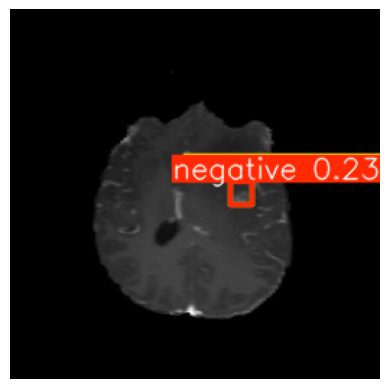

In [ ]:
results[0].plot()  # возвращает изображение с отрисованными bbox

import matplotlib.pyplot as plt
plt.imshow(results[0].plot())
plt.axis('off')
plt.show()


## Второй этап обучения

In [ ]:


model = YOLO('/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs/yolo_brain_tumor3/weights/best.pt')


In [ ]:
# Запускаем дообучение
model.train(
    data=data_path,
    epochs=50,                 # добираем 50 эпох (пример)
    imgsz=640,
    device=DEVICE,
    save_period=5,
    project="/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune1",
    name="yolo_brain_tumor3_tune1",
    resume=False               # # обязательно False, потому что обучение по прежним эпохам уже завершено
)

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/axial_t1wce_2_class.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs/yolo_brain_tumor3/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_brain_tumor3_tune1, nbs=64, nms=False, opset=None, opti

train: Scanning /content/data/labels/train.cache... 296 images, 14 backgrounds, 0 corrupt: 100%|██████████| 310/310 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 126.3±78.5 MB/s, size: 9.0 KB)


val: Scanning /content/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune1/yolo_brain_tumor3_tune1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune1/yolo_brain_tumor3_tune1
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.15G     0.8032     0.6675      0.956          9        640: 100%|██████████| 20/20 [00:12<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all         75         81      0.849      0.693      0.795      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       8.4G     0.8946      0.733     0.9953         10        640: 100%|██████████| 20/20 [00:12<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         75         81      0.797      0.581      0.751      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.42G     0.9114     0.8996      1.019          8        640: 100%|██████████| 20/20 [00:12<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


                   all         75         81       0.15      0.531      0.255      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.35G     0.9623     0.8695      1.023         10        640: 100%|██████████| 20/20 [00:12<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         75         81      0.507      0.765       0.59      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.41G     0.9969     0.9584      1.047         12        640: 100%|██████████| 20/20 [00:12<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         75         81      0.727      0.791      0.827      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.35G      1.049     0.9363      1.061          6        640: 100%|██████████| 20/20 [00:12<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         75         81      0.482      0.568      0.435      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.35G      1.019     0.9987       1.06         10        640: 100%|██████████| 20/20 [00:12<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         75         81      0.719      0.802       0.77      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.35G      0.964     0.9097      1.043         11        640: 100%|██████████| 20/20 [00:12<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         75         81       0.52       0.63      0.607      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.35G      1.088     0.9153      1.072         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         75         81      0.694      0.716      0.709      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.35G      1.089      1.018      1.096          9        640: 100%|██████████| 20/20 [00:11<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         75         81      0.184       0.39      0.105     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.35G      1.039     0.9917      1.069         12        640: 100%|██████████| 20/20 [00:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         75         81      0.638      0.716      0.752      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.36G      1.023     0.9202      1.072          8        640: 100%|██████████| 20/20 [00:12<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]


                   all         75         81      0.643      0.531      0.603      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.36G     0.9415     0.8333      1.043          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         75         81      0.562      0.494       0.62      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.36G     0.9292     0.9014      1.028         13        640: 100%|██████████| 20/20 [00:11<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         75         81      0.688      0.544      0.668      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.37G     0.9771     0.8518      1.025         11        640: 100%|██████████| 20/20 [00:12<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         75         81      0.809      0.681       0.82      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.35G      1.018     0.8537      1.045         10        640: 100%|██████████| 20/20 [00:12<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         75         81      0.469      0.654      0.537      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.35G     0.9444     0.8041      1.037         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         75         81      0.681      0.691       0.74      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.34G     0.9142     0.7654      1.009          9        640: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]


                   all         75         81      0.811      0.716      0.824      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.35G      0.954     0.7649      1.025          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         75         81      0.855      0.654      0.783      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.35G     0.9175     0.7842      1.018         14        640: 100%|██████████| 20/20 [00:11<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]


                   all         75         81      0.846      0.541      0.658      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.35G     0.8817     0.7516     0.9814          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         75         81      0.692      0.284      0.622      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.35G     0.9024     0.7698      1.017          9        640: 100%|██████████| 20/20 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         75         81      0.801      0.753      0.818      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.35G     0.9195     0.7696      1.011         15        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all         75         81      0.659      0.669      0.714      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.35G     0.8821     0.7363     0.9841          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         75         81      0.337      0.852      0.768      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.35G     0.8844     0.7409      1.011         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         75         81      0.868      0.765      0.885      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.35G     0.9119     0.7209      1.015          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         75         81      0.822      0.798      0.855      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.35G      0.865     0.6641     0.9997          8        640: 100%|██████████| 20/20 [00:12<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         75         81      0.829      0.901      0.896      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.35G     0.8166     0.6375     0.9792         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         75         81      0.852      0.728      0.806      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.35G     0.8039     0.6354     0.9735          5        640: 100%|██████████| 20/20 [00:11<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         75         81       0.84      0.647      0.795      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.35G      0.816      0.656     0.9908          8        640: 100%|██████████| 20/20 [00:12<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         75         81      0.816      0.438      0.673      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.35G      0.815     0.6509     0.9533         10        640: 100%|██████████| 20/20 [00:12<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         75         81      0.896      0.494      0.691      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.35G     0.7768     0.5887     0.9357         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         75         81      0.791      0.795      0.873      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.35G     0.8116     0.6258     0.9751          9        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         75         81       0.79      0.836      0.873      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.35G     0.8006      0.592     0.9653          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         75         81      0.585      0.852      0.744      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.35G     0.8132     0.6007     0.9787          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         75         81      0.783      0.704      0.803       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.35G       0.76     0.5819      0.954          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         75         81      0.834      0.827      0.879      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.35G      0.736     0.5487     0.9462         14        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         75         81      0.885      0.763      0.894      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.35G     0.8061      0.595     0.9669         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         75         81      0.684      0.963      0.912      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.35G     0.7652     0.5574     0.9494          7        640: 100%|██████████| 20/20 [00:12<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         75         81      0.823      0.806      0.891      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.35G     0.7387     0.5282     0.9417          7        640: 100%|██████████| 20/20 [00:12<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]


                   all         75         81      0.867      0.883      0.907      0.599
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.35G     0.7248     0.5187     0.9342          6        640: 100%|██████████| 20/20 [00:12<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all         75         81      0.889      0.802      0.889      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.35G     0.7078     0.4917     0.9391          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         75         81      0.887       0.84      0.909      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.35G       0.66     0.4517     0.9056          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all         75         81      0.898      0.871      0.915      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.35G     0.6706       0.44     0.9122          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         75         81      0.849      0.864      0.903      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.35G     0.6703     0.4485     0.9065          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]


                   all         75         81      0.894      0.852      0.906      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.35G     0.6563     0.4234     0.9116          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         75         81      0.883      0.838      0.917      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.35G     0.6409     0.4296     0.8965          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]


                   all         75         81      0.897      0.827       0.91      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.35G     0.6171     0.3936     0.8856          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         75         81       0.87      0.825      0.898      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.35G     0.6045     0.3843     0.8835          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         75         81      0.861      0.815      0.877      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.35G     0.6105     0.3798     0.8811          5        640: 100%|██████████| 20/20 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         75         81      0.887      0.815      0.888       0.61



50 epochs completed in 0.205 hours.
Optimizer stripped from /content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune1/yolo_brain_tumor3_tune1/weights/last.pt, 40.5MB
Optimizer stripped from /content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune1/yolo_brain_tumor3_tune1/weights/best.pt, 40.5MB

Validating /content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune1/yolo_brain_tumor3_tune1/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]


                   all         75         81      0.892       0.84      0.909      0.659
              negative         75         81      0.892       0.84      0.909      0.659
Speed: 0.2ms preprocess, 11.7ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to /content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune1/yolo_brain_tumor3_tune1


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7da98c3ac3d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
img_path = '/content/data/images/test/00019_84.jpg'  # пример пути к тестовому изображению

results = model.predict(img_path, conf=0.2, imgsz=640)



image 1/1 /content/data/images/test/00019_84.jpg: 640x640 1 negative, 37.1ms
Speed: 4.0ms preprocess, 37.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


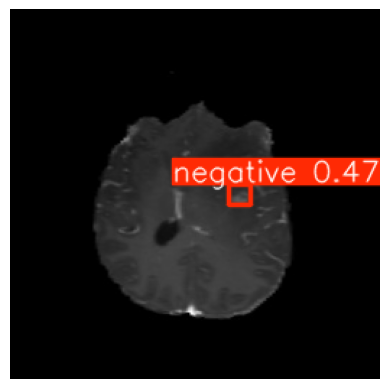

In [ ]:
results[0].plot()  # возвращает изображение с отрисованными bbox

import matplotlib.pyplot as plt
plt.imshow(results[0].plot())
plt.axis('off')
plt.show()

In [ ]:
# путь к папке, где YOLO сохраняет результаты
source_dir = "/content/runs"

# путь, куда сохраняем на Google Диске
target_dir = "/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune1"

# копируем всю папку с поддиректориями
shutil.copytree(source_dir, target_dir, dirs_exist_ok=True)

'/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune1'

## Третий этап обучения

In [ ]:


model = YOLO('/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune1/yolo_brain_tumor3_tune1/weights/best.pt')

In [ ]:
# Загружаем модель


model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    device=DEVICE,
    save_period=5,
    project='/content/runs_tune3',
    name='yolo_brain_tumor_tune3',
    resume=False
)

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/axial_t1wce_2_class.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune1/yolo_brain_tumor3_tune1/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_brain_tumor_tune3, nbs=64, nms=False, opset

train: Scanning /content/data/labels/train.cache... 296 images, 14 backgrounds, 0 corrupt: 100%|██████████| 310/310 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 141.7±90.2 MB/s, size: 9.0 KB)


val: Scanning /content/data/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to /content/runs_tune3/yolo_brain_tumor_tune3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/runs_tune3/yolo_brain_tumor_tune3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       9.1G     0.6437     0.4537     0.9014          9        640: 100%|██████████| 20/20 [00:12<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]


                   all         75         81      0.833      0.803      0.865      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      8.75G     0.7636     0.5401     0.9436         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         75         81      0.636      0.864      0.821      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      8.74G     0.7891     0.6188     0.9511          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]


                   all         75         81      0.789      0.738      0.807       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      8.69G     0.8033     0.6645     0.9614         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]


                   all         75         81      0.886      0.617      0.814      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.73G     0.8613     0.6956      0.997         12        640: 100%|██████████| 20/20 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         75         81      0.781      0.728      0.832      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      8.69G     0.8476     0.7239     0.9813          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         75         81      0.649      0.889      0.844      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      8.69G     0.8328     0.7134     0.9691         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         75         81      0.846       0.61       0.74       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      8.69G     0.8715     0.7133     0.9864         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]


                   all         75         81      0.832      0.802      0.877       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      8.69G     0.8957     0.7017     0.9914         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         75         81      0.808      0.556      0.688      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      8.69G     0.8487      0.701     0.9985          9        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]


                   all         75         81      0.868      0.667       0.78       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      8.69G     0.9111     0.7352     0.9982         12        640: 100%|██████████| 20/20 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         75         81      0.689      0.543      0.652      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      8.69G     0.8506     0.6628     0.9743          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]


                   all         75         81       0.69      0.815      0.824      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      8.69G     0.7912     0.6097     0.9699          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         75         81      0.735      0.716      0.791      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      8.69G     0.8322     0.6683     0.9769         13        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]


                   all         75         81      0.727      0.691      0.767      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.69G      0.838     0.6288     0.9567         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


                   all         75         81       0.79      0.885      0.884      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.69G      0.833     0.6594     0.9663         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         75         81       0.88       0.79      0.888      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.69G     0.8048     0.6008     0.9788         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         75         81      0.853      0.714      0.844      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.69G     0.8054     0.5841     0.9715          9        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         75         81       0.62      0.926      0.878      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.69G     0.8275     0.6043     0.9758          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         75         81      0.787      0.741      0.852      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.69G     0.8426     0.6358     0.9824         14        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         75         81      0.952      0.741      0.916      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.69G     0.7787     0.5906      0.942          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         75         81      0.854      0.864      0.943      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      8.69G     0.7832     0.5989     0.9732          9        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         75         81      0.822      0.799      0.884      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      8.69G     0.7963     0.5824     0.9513         15        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         75         81      0.933      0.345      0.473      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      8.69G     0.7623     0.5472     0.9381          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         75         81      0.858      0.747      0.781       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      8.69G     0.7584     0.5345     0.9647         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         75         81      0.781       0.63      0.814      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.69G     0.7966     0.5759     0.9778          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         75         81      0.815      0.761      0.862      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      8.69G     0.7534      0.559     0.9625          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         75         81      0.881       0.73       0.83      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      8.69G     0.6979     0.5327       0.94         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         75         81      0.819      0.728      0.824      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      8.69G     0.7186     0.5313     0.9274          5        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         75         81      0.885      0.665      0.835       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.69G     0.7379     0.5593     0.9608          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         75         81      0.817      0.608      0.783      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      8.69G      0.733     0.5306     0.9225         10        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         75         81      0.815      0.827      0.849      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      8.69G     0.7062     0.4914     0.9129         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         75         81       0.87      0.667      0.814      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      8.69G     0.7223     0.5254     0.9484          9        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]

                   all         75         81      0.613      0.938      0.871      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      8.69G     0.6871     0.4797     0.9281          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         75         81      0.843      0.654      0.824      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      8.69G     0.7184     0.4978     0.9468          8        640: 100%|██████████| 20/20 [00:11<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]

                   all         75         81      0.621      0.889      0.822      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      8.69G     0.6776     0.4827     0.9346          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         75         81      0.875       0.69       0.87      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      8.69G     0.6543     0.4726     0.9214         14        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         75         81      0.608      0.901      0.814      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      8.69G     0.7193     0.4876     0.9431         11        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         75         81      0.673      0.889      0.814      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      8.69G     0.6826     0.4824      0.924          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         75         81      0.809       0.68      0.831      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      8.69G     0.6643     0.4602     0.9181          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         75         81      0.892      0.815      0.888      0.605


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.69G     0.6556     0.4319     0.9084          6        640: 100%|██████████| 20/20 [00:12<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all         75         81      0.854      0.792      0.899      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      8.69G     0.6342     0.4066     0.9056          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         75         81      0.868       0.79        0.9      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      8.69G     0.5925     0.3722     0.8831          7        640: 100%|██████████| 20/20 [00:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         75         81       0.86      0.833      0.876      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      8.69G     0.5896     0.3807     0.8801          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]


                   all         75         81      0.837      0.824       0.87       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      8.69G     0.6064     0.3872     0.8835          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


                   all         75         81      0.871      0.704      0.858      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      8.69G     0.5656     0.3645     0.8765          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         75         81       0.89      0.799      0.895      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      8.69G     0.5723     0.3518     0.8706          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         75         81      0.904       0.81      0.918      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      8.69G     0.5474     0.3315     0.8592          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         75         81      0.887      0.773      0.901      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.69G     0.5409     0.3402     0.8612          6        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         75         81      0.849      0.763      0.881      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      8.69G     0.5418     0.3355     0.8572          5        640: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]


                   all         75         81      0.864      0.786      0.884      0.599

50 epochs completed in 0.198 hours.
Optimizer stripped from /content/runs_tune3/yolo_brain_tumor_tune3/weights/last.pt, 40.5MB
Optimizer stripped from /content/runs_tune3/yolo_brain_tumor_tune3/weights/best.pt, 40.5MB

Validating /content/runs_tune3/yolo_brain_tumor_tune3/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


                   all         75         81       0.79      0.885      0.883      0.657
              negative         75         81       0.79      0.885      0.883      0.657
Speed: 0.3ms preprocess, 11.5ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to /content/runs_tune3/yolo_brain_tumor_tune3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7da98c461dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Ты привела финальные метрики обучения модели на 50 эпохах. Давай разберём, что значат все эти числа — кратко и понятно:

---

### 📊 **Основные метрики (в строке Class ...):**

| Метрика      | Значение (эпоха 50) | Что означает                                               |
| ------------ | ------------------- | ---------------------------------------------------------- |
| **Box(P)**   | 0.864               | Precision — точность. Насколько предсказанные боксы верны. |
| **R**        | 0.786               | Recall — полнота. Насколько модель находит все объекты.    |
| **mAP50**    | 0.884               | Средняя точность при IoU ≥ 0.5 (основная метрика в YOLO).  |
| **mAP50-95** | 0.599               | Средняя точность по 10 IoU (от 0.5 до 0.95 с шагом 0.05).  |

> ✅ mAP50 ≈ 0.88 — это **хороший результат**, модель хорошо распознаёт объекты.
> ❗ mAP50-95 ≈ 0.60 — сложнее, но тоже неплохо. Это более строгая метрика.

---

### 📉 **Потери (loss):**

| Loss          | Что означает                                             |
| ------------- | -------------------------------------------------------- |
| **box\_loss** | Ошибка предсказания координат боксов                     |
| **cls\_loss** | Ошибка предсказания класса (если бы классов было >1)     |
| **dfl\_loss** | "Distribution Focal Loss" — улучшение локализации боксов |

Все эти значения **падают** к последней эпохе → модель учится успешно. Например:

* box\_loss: с \~0.60 → \~0.54
* cls\_loss: с \~0.38 → \~0.33
* dfl\_loss: с \~0.88 → \~0.85

---

### 📦 **Instances / Size:**

* `Instances`: сколько объектов в среднем в одном батче (примерно 5–6)
* `Size`: размер входного изображения, тут 640×640 пикселей

---

### 💡 Как интерпретировать?

* Модель обучилась и **стабилизировалась**.
* Значения метрик почти не меняются с эпохи 47 по 50 → возможно, уже достигнут предел на этих данных.
* **mAP50 = 0.88** и **Recall = 0.79** — это означает, что большинство опухолей детектируются правильно, и **немного промахов** в полноте (некоторые могут не быть найдены).
* **mAP50-95 = 0.60** — можно улучшать точность локализации (например, дообучением, аугментацией или fine-tuning).

---

Хочешь, я помогу визуализировать прогресс обучения по эпохам (например, график mAP или потерь)?


In [ ]:
# путь к папке, где YOLO сохраняет результаты
source_dir = "/content/runs_tune3"

# путь, куда сохраняем на Google Диске
target_dir = "/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune2"

# копируем всю папку с поддиректориями
shutil.copytree(source_dir, target_dir, dirs_exist_ok=True)

'/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune2'

In [ ]:
img_path = '/content/data/images/test/00019_84.jpg'  # пример пути к тестовому изображению

results = model.predict(img_path, conf=0.2, imgsz=640)


image 1/1 /content/data/images/test/00019_84.jpg: 640x640 1 negative, 37.1ms
Speed: 3.9ms preprocess, 37.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


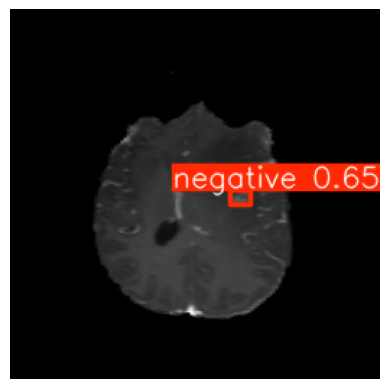

In [ ]:
results[0].plot()  # возвращает изображение с отрисованными bbox

import matplotlib.pyplot as plt
plt.imshow(results[0].plot())
plt.axis('off')
plt.show()

In [ ]:
# импорт библиотек
import os
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
# 2. Укажи путь к папке с изображениями
image_dir = "/content/data/images/test"
image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')])[:10]


In [ ]:
#  Загрузи модель (если не загружена)
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Colab Notebooks/09-04-project/yolo_runs_tune2/yolo_brain_tumor_tune3/weights/best.pt")


image 1/1 /content/data/images/test/00018_101.jpg: 640x640 3 negatives, 37.1ms
Speed: 3.2ms preprocess, 37.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


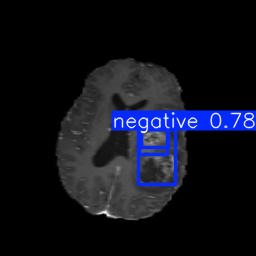


image 1/1 /content/data/images/test/00018_109.jpg: 640x640 2 negatives, 36.9ms
Speed: 3.9ms preprocess, 36.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


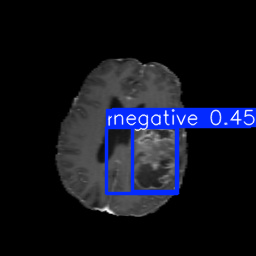


image 1/1 /content/data/images/test/00018_111.jpg: 640x640 3 negatives, 37.0ms
Speed: 3.7ms preprocess, 37.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


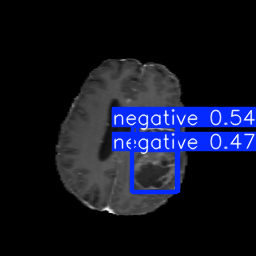


image 1/1 /content/data/images/test/00018_117.jpg: 640x640 1 negative, 36.9ms
Speed: 3.6ms preprocess, 36.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


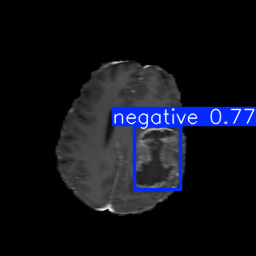


image 1/1 /content/data/images/test/00018_121.jpg: 640x640 1 negative, 23.2ms
Speed: 3.8ms preprocess, 23.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


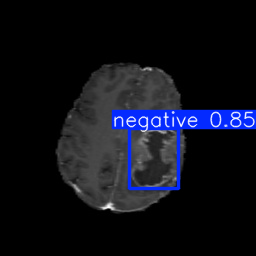


image 1/1 /content/data/images/test/00018_126.jpg: 640x640 2 negatives, 23.1ms
Speed: 3.8ms preprocess, 23.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


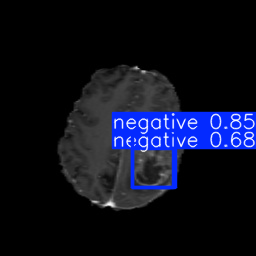


image 1/1 /content/data/images/test/00018_134.jpg: 640x640 1 negative, 23.0ms
Speed: 3.7ms preprocess, 23.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


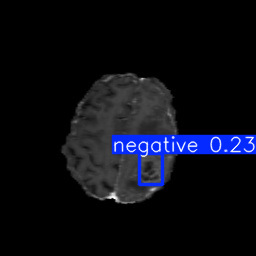


image 1/1 /content/data/images/test/00019_66.jpg: 640x640 1 negative, 22.6ms
Speed: 4.3ms preprocess, 22.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


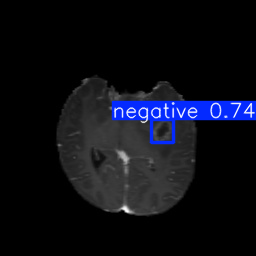


image 1/1 /content/data/images/test/00019_75.jpg: 640x640 2 negatives, 1 positive, 20.8ms
Speed: 4.1ms preprocess, 20.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


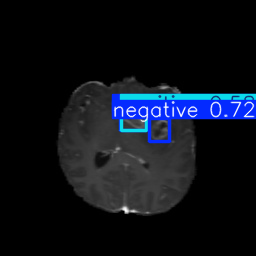


image 1/1 /content/data/images/test/00019_84.jpg: 640x640 1 negative, 19.5ms
Speed: 4.1ms preprocess, 19.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


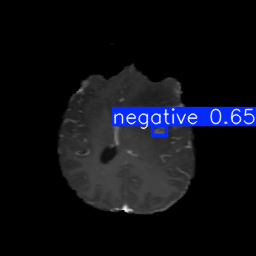

In [ ]:
# Сделай предсказания и отобрази всё
for img_path in image_paths:
    results = model(img_path, conf=0.1)
    result = results[0]

    # Отрисуем картинку с боксами
    result.show()

    # Если хочешь сохранить результат, используй result.save(filename="...")


#### Решаемые задачи YOLO
[Подробнее в документации](https://docs.ultralytics.com/ru/tasks/)

- 🎯 **Обнаружение объектов (Object Detection)**  
  Идентификация и определение местоположения объектов на изображении.

- 🧩 **Сегментация объектов (Object Segmentation)**  
  Обнаружение объектов и определение их границ.

- 🖼 **Классификация изображений (Image Classification)**  
  Классификация изображений по заранее определённым классам.

- 🏃 **Оценка позы (Pose Estimation)**  
  Обнаружение и отслеживание ключевых точек на теле человека.

- 🔄 **Ориентированное обнаружение объектов (Oriented Object Detection, OBB)**  
  Обнаружение объектов с вращением для повышения точности.


#### 1. Дообучение yolo11 (fine-tuning)



In [ ]:
# yolo11n.pt - nano
# yolo11s.pt - small
# yolo11m.pt - medium
# yolo11l.pt - large
# yolo11x.pt - extra large

model = YOLO("yolo11m.pt")

#### 2. Дообучение yolo11 (fine-tuning)

In [ ]:
model = YOLO("yolo11m.pt")

In [ ]:
# Train the model
# Здесь можно найти все знакомые нам аргументы обучения(batch_size, epochs, optimizer, и тд)
# https://docs.ultralytics.com/ru/modes/train/#resuming-interrupted-trainings

results = model.train(
    data="/content/Furniture-6/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    device=DEVICE
    )

#### 3. Инференс(предсказание) дообученной модели

In [ ]:
url = "https://mebel-komfort26.ru/wp-content/uploads/2022/09/diamond_2__2955148_1.jpeg"
results = model.predict(url, conf=0.4)

In [ ]:
# Process results list
for result in results:
    boxes = result.boxes  # bbox нужен для детекции
    masks = result.masks  # Маска нужна для сегментации
    keypoints = result.keypoints  # Для определения позы
    probs = result.probs  # Для классификации найденного объекта
    obb = result.obb  # Ориентированный bbox
    result.show()  # display to screen

In [ ]:
torch.save(model.state_dict(), '/content/furniture.pt')